## Friction Coefficient of a F1 tire

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Read the data from data.json
with open('data.json', 'r') as f:
    data = json.load(f)

print("Data is stored in the following format:")
print("Racers:",data.keys())
print("Lap:",data['VER'].keys())
print("Lap information:",data['VER']["49"].keys())

with open("corners.json", 'r') as f:
    corners = json.load(f)

print("Corners:", corners.keys())
print("Corner 15 information:", corners["CornerNumber"][14], corners["X"][14], corners["Y"][14],corners["Angle"][14],corners["Distance"][14])
print("Corner 16 information:", corners["CornerNumber"][15], corners["X"][15], corners["Y"][15],corners["Angle"][15],corners["Distance"][15])


Data is stored in the following format:
Racers: dict_keys(['VER', 'HUL', 'PIA', 'NOR', 'SAI', 'OCO', 'ALO', 'LEC', 'BEA', 'HAM', 'ALB', 'STR', 'RUS', 'GAS'])
Lap: dict_keys(['49', '50', '51', '52'])
Lap information: dict_keys(['time', 'speed', 'distance'])
Corners: dict_keys(['CornerNumber', 'X', 'Y', 'Angle', 'Distance', 'Rotation'])
Corner 15 information: 15 2398.9521484375 -4099.2412109375 -81.47941394640335 4984.092735435512
Corner 16 information: 16 -620.4287109375 -993.7661743164062 61.329159623640706 5431.602779987257


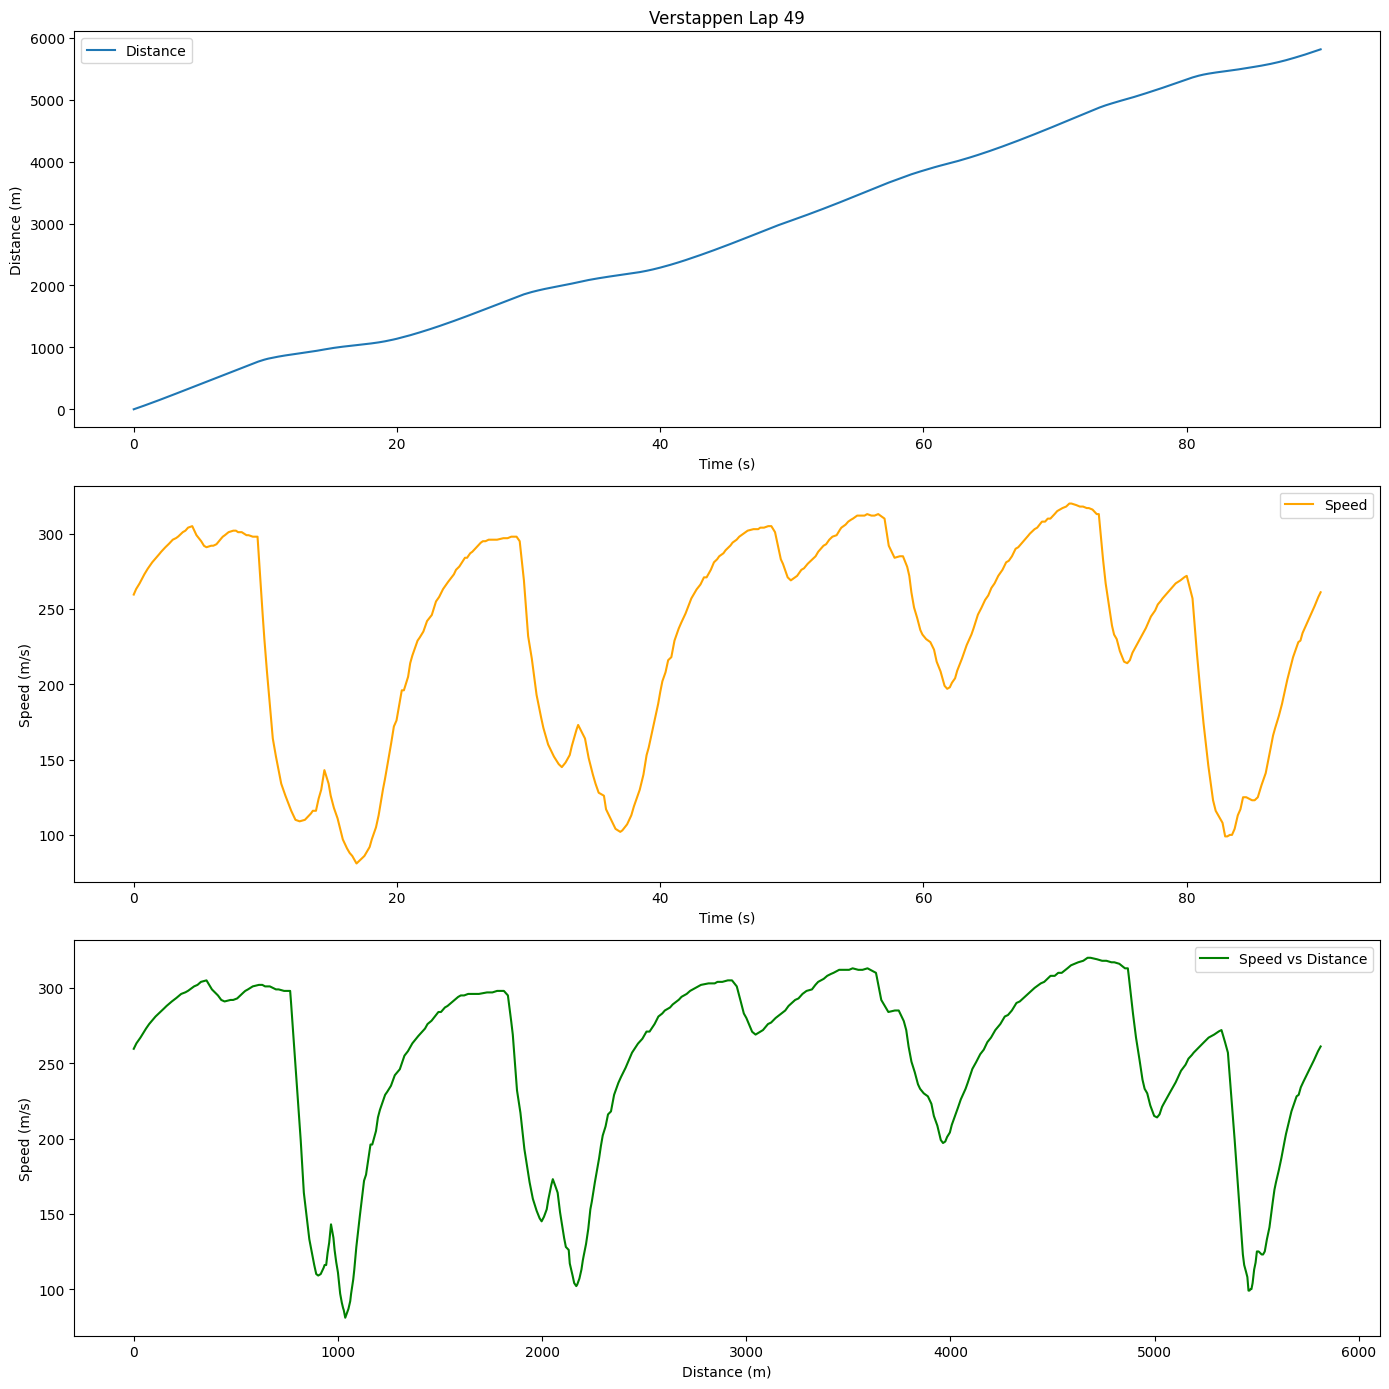

In [3]:
plt.figure(figsize=(14, 14))
plt.subplot(3, 1, 1)
plt.title("Verstappen Lap 49")
plt.plot(data['VER']["49"]['time'], data['VER']["49"]["distance"], label='Distance')
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.legend()

plt.subplot(3, 1, 2)
# plt.title("Verstappen Lap 49 Speed")
plt.plot(data['VER']["49"]['time'], data['VER']["49"]["speed"], label='Speed', color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data["VER"]["49"]['distance'], data["VER"]["49"]["speed"], label='Speed vs Distance', color='green')
plt.xlabel("Distance (m)")
plt.ylabel("Speed (m/s)")
plt.legend()
plt.tight_layout()
plt.show()

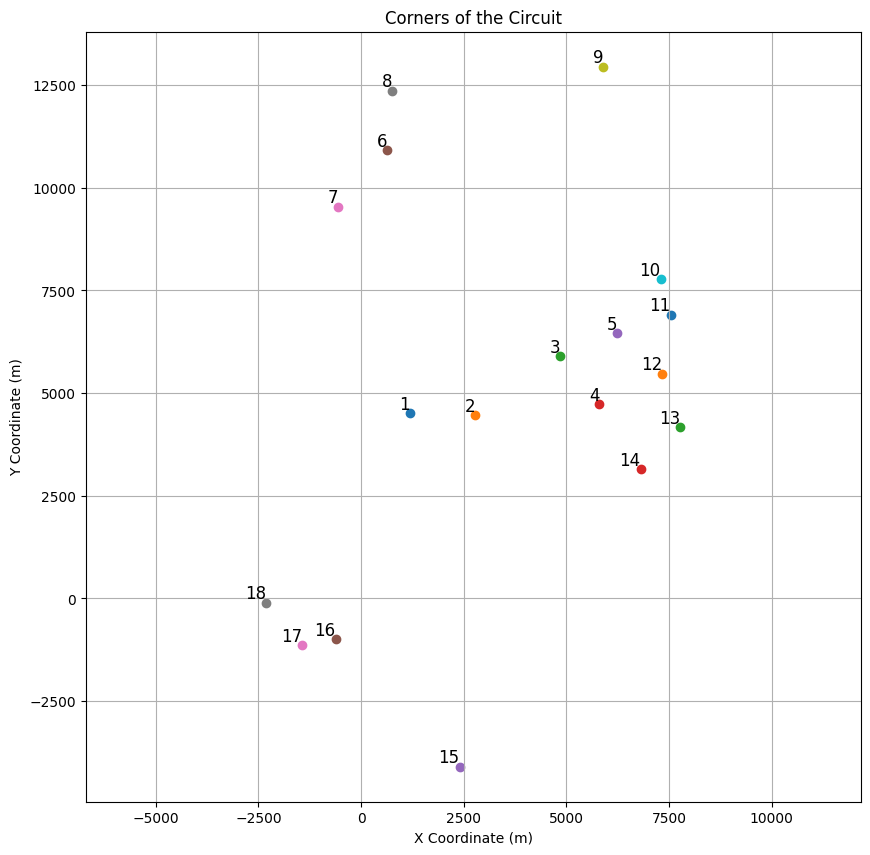

In [4]:
## Scatter plot the corner X Y coordinates
plt.figure(figsize=(10, 10))
for i in range(len(corners["CornerNumber"])):
    plt.scatter(corners["X"][i], corners["Y"][i])
    plt.annotate(corners["CornerNumber"][i], (corners["X"][i], corners["Y"][i]), fontsize=12, ha='right', va='bottom')

plt.title("Corners of the Circuit")
plt.xlabel("X Coordinate (m)")
plt.ylabel("Y Coordinate (m)")
plt.grid()
plt.axis('equal')
plt.show()

In [5]:
x = np.array(corners["X"])
y = np.array(corners["Y"])
angles = np.array(corners["Angle"])
distances = np.array(corners["Distance"])



{49: {'tel': {'time': [0.0, 0.165, 0.18, 0.34, 0.445, 0.62, 0.759, 0.805, 1.005, 1.059, 1.139, 1.359, 1.405, 1.605, 1.639, 1.805, 1.939, 2.085, 2.3, 2.32, 2.405, 2.645, 2.68, 2.965, 3.08, 3.205, 3.22, 3.365, 3.38, 3.64, 3.725, 3.8, 3.925, 4.125, 4.445, 4.619, 4.72, 4.765, 4.899, 5.099, 5.125, 5.325, 5.339, 5.526, 5.56, 5.739, 5.885, 6.045, 6.1, 6.285, 6.36, 6.565, 6.66, 6.765, 6.9, 6.925, 7.139, 7.205, 7.379, 7.565, 7.619, 7.765, 7.859, 7.925, 8.205, 8.3, 8.565, 8.6, 8.725, 8.86, 9.045, 9.16, 9.4, 9.405, 9.46, 9.725, 9.8, 9.925, 10.02, 10.125, 10.22, 10.42, 10.565, 10.64, 10.72, 10.805, 10.981, 11.005, 11.205, 11.24, 11.5, 11.525, 11.899, 11.965, 12.179, 12.286, 12.519, 12.605, 12.94, 13.005, 13.099, 13.445, 13.46, 13.605, 13.7, 13.845, 13.919, 14.02, 14.045, 14.245, 14.26, 14.485, 14.5, 14.78, 14.805, 14.965, 15.1, 15.205, 15.42, 15.485, 15.86, 15.885, 16.02, 16.205, 16.405, 16.46, 16.605, 16.68, 16.925, 17.12, 17.165, 17.28, 17.525, 17.58, 17.879, 17.925, 18.04, 18.085, 18.199, 18.40

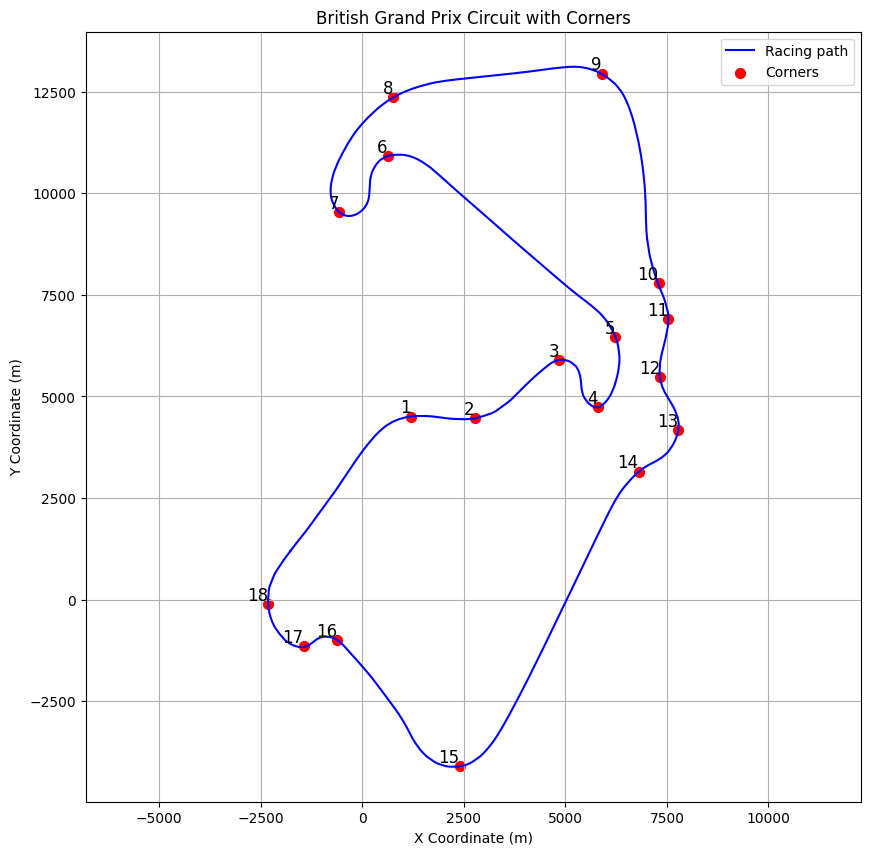

In [10]:
from pathlib import Path
import json

# Base path (already inside F1_friction)
race_data_path = Path("RaceData")

# Store data as { "Driver": { lap_number: data_dict } }
race_data = {}

# Loop over each driver directory
for driver_dir in race_data_path.iterdir():
    if driver_dir.is_dir():
        driver_name = driver_dir.name
        race_data[driver_name] = {}

        # Only include laps 49 to 52
        for lap in range(49, 53):
            json_file = driver_dir / f"{lap}_tel.json"
            if json_file.exists():
                with open(json_file, "r") as f:
                    try:
                        race_data[driver_name][lap] = json.load(f)
                    except json.JSONDecodeError as e:
                        print(f"Failed to load {json_file}: {e}")
print(race_data["VER"])
print(race_data["VER"][49]["tel"].keys())

full_racer_data = {}

for racer in race_data:
    full_racer_data[racer] = {}

    for lap in range(49, 53):
        full_racer_data[racer][lap] = {}
        try:
            for key in race_data[racer][lap]["tel"].keys():
                full_racer_data[racer][lap][key] = race_data[racer][lap]["tel"][key]
        except KeyError as e:
            #delete racer if lap not found
            print(f"Lap {lap} not found for {racer}, deleting racer")
            del full_racer_data[racer]
            break

plt.figure(figsize=(10, 10))
plt.plot(full_racer_data['VER'][49]["x"], full_racer_data['VER'][49]["y"], label='Racing path', color='blue')
plt.scatter(corners["X"], corners["Y"], c='red', label='Corners', s=50)
for i in range(len(corners["CornerNumber"])):
    plt.annotate(corners["CornerNumber"][i], (corners["X"][i], corners["Y"][i]), fontsize=12, ha='right', va='bottom')
plt.legend()
plt.title("British Grand Prix Circuit with Corners")
plt.xlabel("X Coordinate (m)")
plt.ylabel("Y Coordinate (m)")
plt.grid()
plt.axis('equal')
plt.show()

In [7]:
idxs = np.where(np.array(full_racer_data["VER"][49]["y"]) < -3100)[0]  # Find indices where y coordinate is less than -3100
corner_start = idxs[0]  # Start of the corner
corner_end = idxs[-1]  # End of the corner

distance = full_racer_data["VER"][49]["distance"][corner_end] - full_racer_data["VER"][49]["distance"][corner_start]
print(f"Distance of the corner: {distance} m")
print("Start of turn",full_racer_data["VER"][49]["distance"][corner_start])
print("End of turn",full_racer_data["VER"][49]["distance"][corner_end] )

#Find coordinates of start and end
start_x = full_racer_data["VER"][49]["x"][corner_start]
start_y = full_racer_data["VER"][49]["y"][corner_start]
end_x = full_racer_data["VER"][49]["x"][corner_end]
end_y = full_racer_data["VER"][49]["y"][corner_end]
print(f"Start coordinates: ({start_x}, {start_y})")
print(f"End coordinates: ({end_x}, {end_y})")


velocities = np.array(full_racer_data["VER"][49]["speed"])
corner_velocities = velocities[corner_start:corner_end+1]
average_velocity = np.mean(corner_velocities)
print("Velocity at the start of the corner:", corner_velocities[0])
print("Velocity at the end of the corner:", corner_velocities[-1])
print("Average velocity during the corner:", average_velocity)

print(corner_start, corner_end)

Distance of the corner: 310.98318296514117 m
Start of turn 4840.210428145971
End of turn 5151.193611111112
Start coordinates: (3406.0, -3214.0)
End coordinates: (1087.2208418169137, -3123.9094299498183)
Velocity at the start of the corner: 314.56112700967986
Velocity at the end of the corner: 249.0
Average velocity during the corner: 248.98890347835396
554 586
